In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def calculate_z(x, y, smearing=False):
    
    # Gaussian + quadratic relation
    z = 80*np.exp(-(x-75)**2/30**2) + 0.3 * y + 0.005*y*y

    # Linear relation
    # z = 20 + x + 2*y
    if smearing:
        sig_z = 0.1 + (x + y) / 1000 # Up to 0.3
        z = z + np.random.normal(z, sig_z * z)

    return z

# Inspecting calculate_z by plotting x and y projections

(0.0, 184.20108381032983)

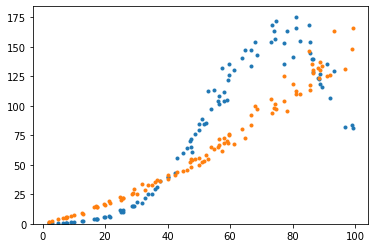

In [3]:
#  z function
data_non_zero = np.random.rand(100) * 100
data_zero = np.zeros(100)

plt.plot(
    data_non_zero,
    calculate_z(data_non_zero, data_zero, smearing=True),
    linestyle='none',
    marker='o',
    markersize=3
)
plt.plot(
    data_non_zero,
    calculate_z(data_zero, data_non_zero, smearing=True),
    linestyle='none',
    marker='o',
    markersize=3
)

ax = plt.gca()
ylim = ax.get_ylim()
ax.set_ylim(0, ylim[1])

# Creating a large dataset

In [4]:
def create_dataset(size):
    data_x = np.random.rand(size) * 100
    data_y = np.random.rand(size) * 100

    data_z = calculate_z(data_x, data_y, smearing=True)

    df = pd.DataFrame({'x': data_x, 'y': data_y, 'z': data_z})
    return df 

In [5]:
# Creating dataset for plotting
data = create_dataset(100_000)
data

,x,y,z
0,52.374974,12.284667,81.889431
1,75.111360,56.417819,260.093306
2,50.327249,47.452314,141.311151
3,56.243387,42.225232,165.570815
4,27.649122,90.073167,160.549925
...,...,...,...
99995,84.214260,34.794077,185.209443
99996,73.416285,44.882038,196.655579
99997,88.318454,73.637876,238.006505
99998,73.395519,91.566705,325.179050


### Plotting data

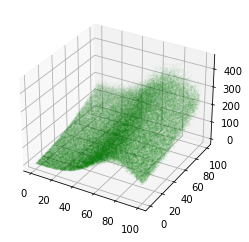

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['x'], data['y'], data['z'], c='g', s=0.001)

## Scaling and splitting data

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# Splitting data
features = np.array(data[['x', 'y']])
target = np.array(data[['z']])
# target = np.ravel(target)
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    random_state=1
)

In [9]:
# Scaling data
scaler_features = StandardScaler()  
scaler_features.fit(features_train)

features_train_scaled = scaler_features.transform(features_train)  
features_test_scaled = scaler_features.transform(features_test)

scaler_target = StandardScaler()  
scaler_target.fit(target_train)

target_train_scaled = scaler_target.transform(target_train)

# MLP Regression

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [11]:
reg = MLPRegressor(
    hidden_layer_sizes=(6, 6),
    activation="relu",
    random_state=1,
    max_iter=2000
).fit(features_train_scaled, np.ravel(target_train_scaled))

In [12]:
pred_test = reg.predict(features_test_scaled)
pred_test = scaler_target.inverse_transform(pred_test)
print(pred_test.shape)

(25000,)


Abs: -0.818 +/- 18.7
Rel: 0.0164 +/- 0.244


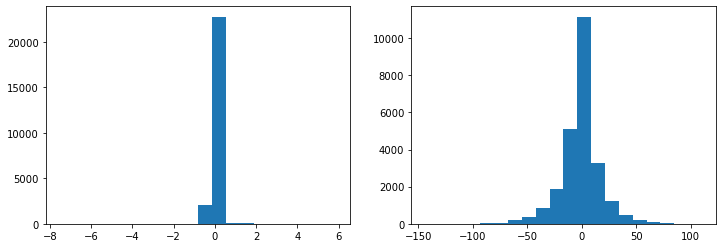

In [13]:
abs_deviation = (pred_test - np.ravel(target_test))
rel_deviation = abs_deviation / np.ravel(target_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(rel_deviation, bins=20)
ax2.hist(abs_deviation, bins=20)

mean_abs = np.mean(abs_deviation)
std_abs = np.std(abs_deviation)
print('Abs: {:.3} +/- {:.3}'.format(mean_abs, std_abs))

mean_rel = np.mean(rel_deviation)
std_rel = np.std(rel_deviation)
print('Rel: {:.3} +/- {:.3}'.format(mean_rel, std_rel))


Text(0.5, 0, 'y')

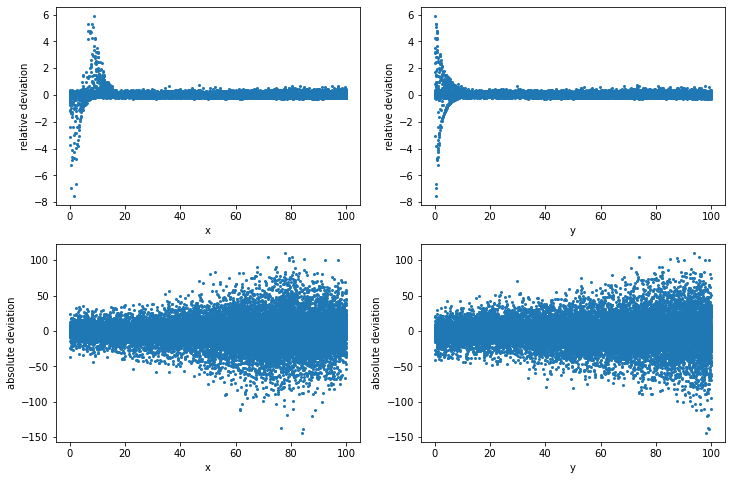

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ms = 2
mm = 'o'

ax1.plot(
    features_test[:,0],
    rel_deviation,
    linestyle='none',
    marker=mm,
    markersize=ms
)
ax1.set_ylabel('relative deviation')
ax1.set_xlabel('x')

ax2.plot(
    features_test[:,1],
    rel_deviation,
    linestyle='none',
    marker=mm,
    markersize=ms
)
ax2.set_ylabel('relative deviation')
ax2.set_xlabel('y')

ax3.plot(
    features_test[:,0],
    abs_deviation,
    linestyle='none',
    marker=mm,
    markersize=ms
)
ax3.set_ylabel('absolute deviation')
ax3.set_xlabel('x')

ax4.plot(
    features_test[:,1],
    abs_deviation,
    linestyle='none',
    marker=mm,
    markersize=ms
)
ax4.set_ylabel('absolute deviation')
ax4.set_xlabel('y')

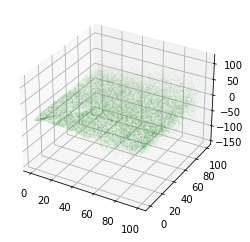

In [15]:
features_test[:,0]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(features_test[:,0], features_test[:,1], abs_deviation, c='g', s=0.001)

In [16]:
score = reg.score(features_test, target_test)
score

-4.3914098259062655